In [44]:
from IPython.display import display, Math, Latex
import math
from math import sqrt, cos, sin, pi
import numpy as np
from numpy import linspace
import statsmodels.api as sm
from scipy.interpolate import interp1d
from scipy.integrate import quad
from scipy.stats import norm
from scipy.stats.kde import gaussian_kde
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.mlab as ml
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
import seaborn as sb
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [45]:
# physical constants for natural units c = G = 1
c=2.99792458*(10**8)
G=6.67428*(10**(-11))
s_mass=G*(1.98892*10**(30))/(c**3)

# common function shortcuts
log10 = np.log10
pi = np.pi
sqrt = np.sqrt

In [17]:
'params'

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 4,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.2,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True}

# functions which will normalize the bins

def hist_weight(lst):
    return np.ones_like(lst)/len(lst)

def auto_bin(bin_size, min_edge, max_edge):
    #bin_size = 0.05; min_edge = -3.5; max_edge = -1
    N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
    bin_list = np.linspace(min_edge, max_edge, Nplus1)
    return bin_list

In [18]:
### comparing strain
pi = np.pi
sqrt = np.sqrt

def strain(mc, d, f):
    z = 2
    return sqrt(32/5) * (pow(mc, 5/3)/ d) * pow((pi*f*(1+z)),2/3)
    
smbh = strain(10**9, 500, 1e-9)
ligo = strain(10, 200, 100)

print("smbh = ", smbh)
print("ligo = ", ligo)

print("big = ", strain(10**9, 500, 1e-9))
print("small = ", strain(10**4, 500, 1e-9))



smbh =  22575327.929496773
ligo =  56.438319823741814
big =  22575327.929496773
small =  0.10478539003269885


25.494992913514636
[-3.44340662 -2.52727061 -2.80392353 ... -3.79815466 -3.42471144
 -3.32462275]
kh13 =  -3.3124969169507246
mm13 =  -3.2047686477612465
hr04 =  -3.3526607835592395


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


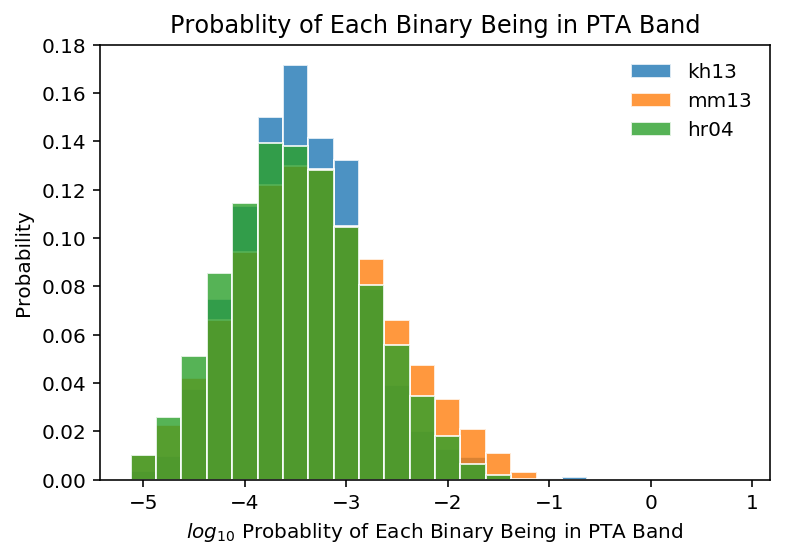

In [19]:
#probablity of each binary being in PTA band
kh13prob = []
for i in range(100):
        filenamekh = "test_sources/KH13/test02/kh13Test_"+str(i)+"_test"
        kh13prob = np.hstack((kh13prob, np.genfromtxt(filenamekh,  usecols=(9), dtype='float')))

mm13prob = []
for i in range(100):
        filenamemm = "test_sources/MM13/test02/mm13Test_"+str(i)+"_test"
        mm13prob = np.hstack((mm13prob, np.genfromtxt(filenamemm,  usecols=(9), dtype='float')))

hr04prob = []
for i in range(100):
        filenamehr = "test_sources/HR04/test02/hr04Test_"+str(i)+"_test"
        hr04prob = np.hstack((hr04prob, np.genfromtxt(filenamehr,  usecols=(9), dtype='float')))

mmsum = np.sum(mm13prob)
print(mmsum)
  
#logged prob
kh13prob = log10(kh13prob)   
mm13prob = log10(mm13prob)   
hr04prob = log10(hr04prob)   
    
    
#weight
weightkh = hist_weight(kh13prob)
weightmm = hist_weight(mm13prob)
weighthr = hist_weight(hr04prob)

print(kh13prob)


#bins
bin_kh13 = auto_bin(0.25, -5, 1)
bin_mm13 = auto_bin(0.25, -5, 1)
bin_hr04 = auto_bin(0.25, -5, 1)


#plot
plt.hist(kh13prob,bins = bin_kh13, weights=weightkh, alpha = 0.8, align='left', color = 'C0', label = "kh13", edgecolor = "w")
plt.hist(mm13prob,bins = bin_mm13, weights=weightmm, alpha = 0.8, align='left', color = 'C1', label = "mm13", edgecolor = "w")
plt.hist(hr04prob,bins = bin_hr04, weights=weighthr, alpha = 0.8, align='left', color = 'C2', label = "hr04", edgecolor = "w")



#calc mean
khprobmean = np.mean(kh13prob)
mmprobmean = np.mean(mm13prob)
hrprobmean = np.mean(hr04prob)


print("kh13 = ", khprobmean)
print("mm13 = ", mmprobmean)
print("hr04 = ", hrprobmean)


#style
plt.xlabel("$log_{10}$ Probablity of Each Binary Being in PTA Band")
plt.ylabel("Probability")
plt.title("Probablity of Each Binary Being in PTA Band")
plt.legend(frameon=False)

#saved file
plt.savefig("probability.pdf")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


kh13 =  8.579238258296657
mm13 =  8.189861463766531
hr04 =  8.048374092267148


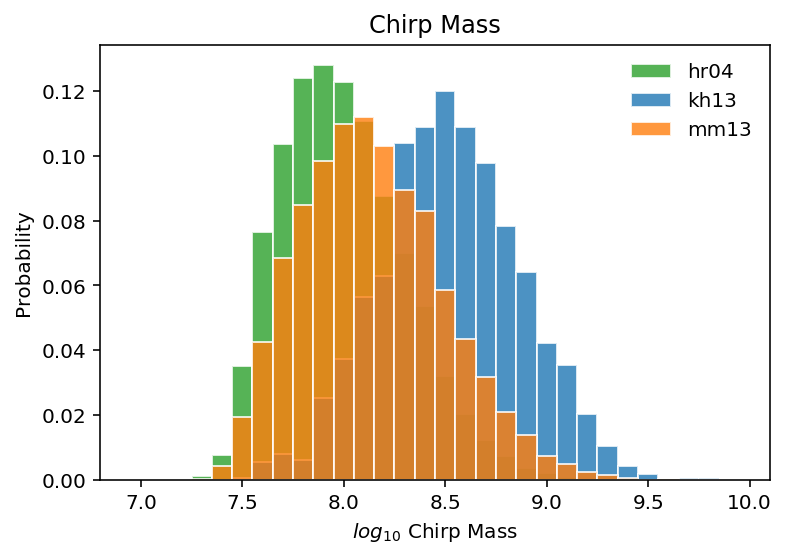

In [20]:
#kh13 chirp mass
kh13mc = []
for i in range(100):
        filenamekh = "test_sources/KH13/test02/kh13Test_"+str(i)+"_test"
        kh13mc = np.hstack((kh13mc, np.genfromtxt(filenamekh,  usecols=(4), dtype='float')))

mm13mc = []
for i in range(100):
        filenamemm = "test_sources/MM13/test02/mm13Test_"+str(i)+"_test"
        mm13mc = np.hstack((mm13mc, np.genfromtxt(filenamemm,  usecols=(4), dtype='float')))

hr04mc = []
for i in range(100):
        filenamehr = "test_sources/HR04/test02/hr04Test_"+str(i)+"_test"
        hr04mc = np.hstack((hr04mc, np.genfromtxt(filenamehr,  usecols=(4), dtype='float')))

        
#logged mass       
kh13mc = log10(kh13mc)
mm13mc = log10(mm13mc)
hr04mc = log10(hr04mc)



#weight
weightkhmc = hist_weight(kh13mc)
weightmmmc = hist_weight(mm13mc)
weighthrmc = hist_weight(hr04mc)


#bins
bin_khmc = auto_bin(0.1, 7, 10)
bin_mmmc = auto_bin(0.1, 7, 10)
bin_hrmc = auto_bin(0.1, 7, 10)

#plot
plt.hist(hr04mc,bins = bin_hrmc, weights=weighthrmc, alpha = 0.8, align='left', color = 'C2', label = "hr04", edgecolor = "w")
plt.hist(kh13mc,bins = bin_khmc, weights=weightkhmc, alpha = 0.8, align='left', color = 'C0', label = "kh13", edgecolor = "w")
plt.hist(mm13mc,bins = bin_mmmc, weights=weightmmmc, alpha = 0.8, align='left', color = 'C1', label = "mm13", edgecolor = "w")


#calc mean
khmcmean = np.mean(kh13mc)
mmmcmean = np.mean(mm13mc)
hrmcmean = np.mean(hr04mc)

print("kh13 = ", khmcmean)
print("mm13 = ", mmmcmean)
print("hr04 = ", hrmcmean)


#style
plt.xlabel("$log_{10}$ Chirp Mass")
plt.ylabel("Probability")
plt.title("Chirp Mass")
plt.legend(frameon=False)

#saved file
plt.savefig("chirpmass.pdf")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


kh13 =  8.012905875922463
mm13 =  8.661867200139342
hr04 =  8.897679485971647


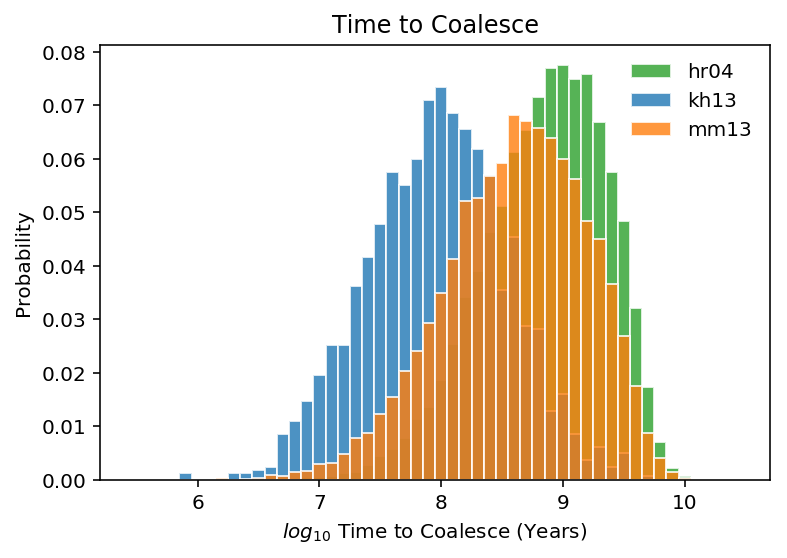

In [21]:
#time to coalesce
kh13col = []
for i in range(100):
        filenamekh = "test_sources/KH13/test02/kh13Test_"+str(i)+"_test"
        kh13col = np.hstack((kh13col, np.genfromtxt(filenamekh,  usecols=(13), dtype='float')))

mm13col = []
for i in range(100):
        filenamemm = "test_sources/MM13/test02/mm13Test_"+str(i)+"_test"
        mm13col = np.hstack((mm13col, np.genfromtxt(filenamemm,  usecols=(13), dtype='float')))

hr04col = []
for i in range(100):
        filenamehr = "test_sources/HR04/test02/hr04Test_"+str(i)+"_test"
        hr04col = np.hstack((hr04col, np.genfromtxt(filenamehr,  usecols=(13), dtype='float')))


#logged time
kh13col = log10(kh13col)
mm13col = log10(mm13col)
hr04col = log10(hr04col)


#weight
weightkhcol = hist_weight(kh13col)
weightmmcol = hist_weight(mm13col)
weighthrcol = hist_weight(hr04col)


#bins
bin_khcol = auto_bin(0.1, 5.5, 10.5)
bin_mmcol = auto_bin(0.1, 5.5, 10.5)
bin_hrcol = auto_bin(0.1, 5.5, 10.5)


#plot
plt.hist(hr04col, bins = bin_hrcol, weights=weighthrcol, alpha = 0.8, align='left', color = 'C2', label = "hr04", edgecolor = "w")
plt.hist(kh13col, bins = bin_khcol, weights=weightkhcol, alpha = 0.8, align='left', color = 'C0', label = "kh13", edgecolor = "w")
plt.hist(mm13col, bins = bin_mmcol, weights=weightmmcol, alpha = 0.8, align='left', color = 'C1', label = "mm13", edgecolor = "w")


#calc mean
khtcmean = np.mean(kh13col)
mmtcmean = np.mean(mm13col)
hrtcmean = np.mean(hr04col)

print("kh13 = ", khtcmean)
print("mm13 = ", mmtcmean)
print("hr04 = ", hrtcmean)


#style
plt.xlabel("$log_{10}$ Time to Coalesce (Years) ")
plt.ylabel("Probability")
plt.title("Time to Coalesce")
plt.legend(frameon=False)

#saved file
plt.savefig("timecoalesce.pdf")

khmean  16.34
mmmean  90.31
mmmean  228.88


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


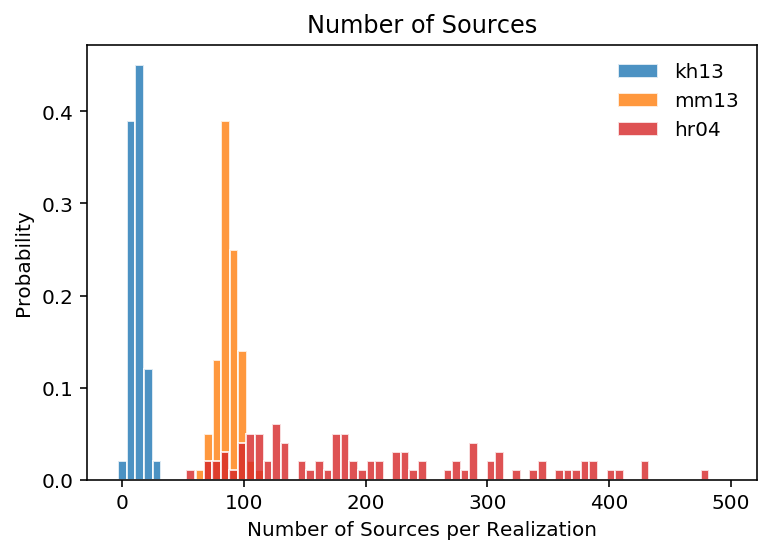

In [22]:
#number of Sources per Realization
kh13Sources =  [14, 13, 20, 11, 17, 8, 16, 11, 20, 14, 20, 14, 15, 16, 7, 17, 16, 15, 18, 20, 14, 25, 11, 15, 19, 30, 11, 19, 12, 17, 21, 22, 12, 20, 18, 25, 19, 19, 11, 17, 7, 22, 19, 12, 13, 27, 8, 13, 12, 22, 11, 19, 18, 13, 14, 13, 13, 22, 16, 20, 13, 17, 11, 14, 11, 15, 20, 14, 26, 14, 13, 15, 15, 19, 11, 25, 13, 30, 21, 20, 21, 21, 17, 17, 9, 20, 18, 10, 11, 20, 24, 14, 15, 8, 22, 23, 11, 11, 16, 16]
mm13Sources = [88, 89, 90, 99, 87, 83, 83, 96, 88, 88, 77, 91, 95, 99, 97, 103, 94, 99, 90, 88, 104, 87, 100, 101, 79, 88, 92, 86, 80, 89, 92, 77, 94, 79, 100, 88, 81, 107, 99, 88, 81, 98, 101, 94, 84, 90, 100, 91, 116, 77, 87, 82, 80, 93, 76, 95, 87, 88, 85, 86, 69, 86, 94, 94, 98, 80, 86, 86, 98, 82, 86, 87, 98, 101, 97, 90, 86, 95, 108, 81, 94, 87, 99, 88, 88, 101, 97, 92, 77, 94, 85, 93, 85, 93, 92, 88, 86, 91, 86, 87]
hr04Sources =  [114, 234, 140, 179, 209, 569, 176, 132, 242, 284, 158, 181, 228, 190, 73, 290, 306, 393, 104, 165, 162, 108, 182, 88, 347, 100, 294, 210, 237, 131, 116, 290, 309, 108, 656, 250, 313, 131, 343, 133, 132, 314, 115, 184, 108, 104, 82, 384, 278, 390, 100, 279, 181, 189, 61, 72, 328, 197, 196, 150, 436, 215, 269, 108, 199, 403, 409, 88, 291, 368, 217, 118, 137, 316, 97, 361, 124, 350, 134, 374, 484, 78, 228, 114, 128, 140, 232, 605, 149, 381, 108, 250, 190, 121, 182, 86, 825, 186, 237, 431]

#calc mean
khmean = np.mean(kh13Sources)
print("khmean " , khmean)
mmmean = np.mean(mm13Sources)
print("mmmean " , mmmean)
hrmean = np.mean(hr04Sources)
print("mmmean " , hrmean)


#weight
weightkhsource = hist_weight(kh13Sources)
weightmmsource = hist_weight(mm13Sources)
weighthrsource = hist_weight(hr04Sources)


#bins
bin_khsource = auto_bin(7, 0, 50)
bin_mmsource = auto_bin(7, 50, 120)
bin_hrsource = auto_bin(7, 0, 500)


#plot
plt.hist(kh13Sources, bins = bin_khsource, weights=weightkhsource, alpha = 0.8, align='left', color = 'C0', label = "kh13", edgecolor = "w")
plt.hist(mm13Sources, bins = bin_mmsource, weights=weightmmsource, alpha = 0.8, align='left', color = 'C1', label = "mm13", edgecolor = "w")
plt.hist(hr04Sources, bins = bin_hrsource, weights=weighthrsource, alpha = 0.8, align='left', color = 'C3', label = "hr04", edgecolor = "w")

#style
plt.xlabel("Number of Sources per Realization")
plt.ylabel("Probability")
plt.title("Number of Sources")
plt.legend(frameon=False)

#saved file
plt.savefig("noSources.pdf")

In [23]:
kh13stalled = [2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 5, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1]
hr04stalled =  [7, 25, 9, 20, 19, 84, 15, 7, 28, 23, 10, 13, 21, 31, 3, 34, 39, 36, 5, 10, 10, 3, 10, 2, 41, 5, 31, 9, 15, 8, 8, 24, 31, 7, 131, 33, 38, 3, 38, 10, 4, 32, 6, 12, 7, 6, 5, 59, 29, 42, 4, 55, 13, 15, 2, 3, 45, 15, 18, 12, 61, 18, 34, 7, 17, 79, 71, 3, 28, 54, 17, 10, 12, 45, 5, 45, 4, 52, 8, 59, 72, 5, 23, 9, 11, 5, 20, 103, 10, 43, 6, 28, 14, 15, 14, 9, 148, 21, 23, 56]
mm13stalled =  [8, 5, 10, 7, 6, 8, 7, 8, 8, 5, 7, 4, 6, 10, 6, 7, 12, 8, 7, 6, 9, 5, 6, 5, 4, 9, 8, 12, 5, 4, 9, 5, 5, 10, 10, 8, 7, 4, 6, 9, 6, 10, 10, 9, 5, 9, 9, 12, 7, 9, 6, 5, 7, 10, 1, 5, 6, 8, 4, 6, 3, 8, 5, 5, 6, 9, 5, 5, 6, 9, 6, 5, 9, 7, 8, 6, 5, 5, 8, 6, 6, 6, 8, 5, 6, 4, 10, 6, 4, 4, 6, 7, 7, 11, 8, 12, 3, 11, 7, 2]

In [53]:
def Mk2mStar(mag):
    """
    converting from k-band luminosity to M* using Eq.2 from Ma et al. (2014)
    valid for early-type galaxies
    """
    Mstar = 10.58-0.44*(mag + 23)
    return 10**(Mstar)

In [55]:
#mass total

def getMtot(ans, q):
    return ans / ((q/(1+q)**2)**(3/5))

[1.06521997e+08 2.17573819e+08 1.10846609e+08 3.79028489e+08
 1.82217712e+08 6.21004194e+07 3.37618064e+08 6.07830599e+07
 5.84490029e+07 9.27673199e+07 1.86405435e+08 6.85014562e+08
 1.32345192e+08 2.31822656e+08 6.37348493e+07 1.29204033e+08
 5.64794025e+07 2.14340503e+08 8.24216104e+07 2.00356686e+08
 5.60539536e+07 4.94933535e+07 1.24391560e+08 4.64997885e+07
 1.02536553e+08 6.24155319e+07 9.00239717e+07 3.30000000e+09
 2.92917363e+08 9.92382206e+07 7.20212915e+07 1.90548787e+08
 3.72217744e+08 2.24590465e+08 1.11008563e+08 1.22365001e+08
 7.14290813e+07 3.30000000e+09 1.22600789e+08 1.17057555e+08
 9.73220778e+07 8.17715675e+07 1.92231772e+08 1.08014756e+08
 3.26561717e+08 2.89221659e+08 1.26566264e+08 3.21212840e+08
 7.21327207e+07 8.19952941e+07 3.30000000e+09 3.72096998e+08
 1.07385595e+08 6.81800645e+07 8.73369354e+08 7.32888973e+08
 2.26428120e+08 1.33299725e+08 9.21470427e+07 1.24457003e+08
 3.30000000e+09 3.16823067e+08 1.12418130e+08 1.97956877e+08
 7.45853221e+07 2.832698

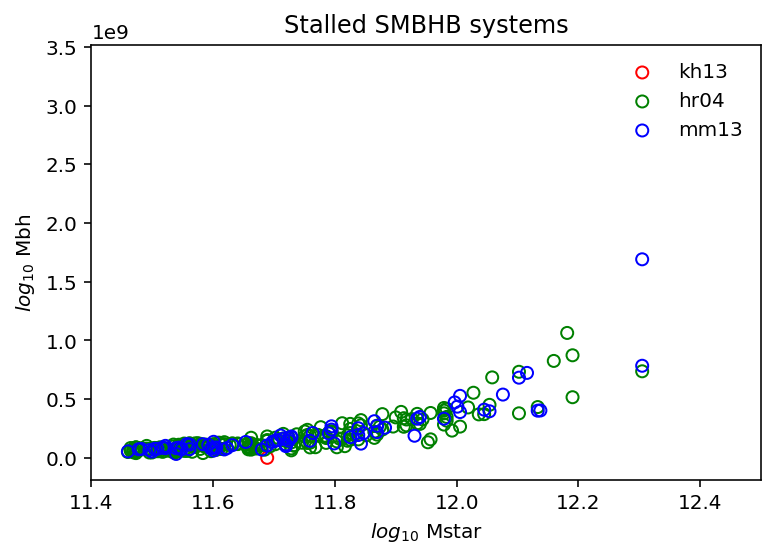

In [125]:
#M-mbulge for stalled
kh13bh = []
kh13mstar =[]
khq = []
for i in range(10):
        filenamekh = "test_stalled/KH13/test01/kh13Test_"+str(i)+"_test"
        #mstar_list
        kh13mstar = np.hstack((kh13mstar, np.genfromtxt(filenamekh,  usecols=(8), dtype='float')))
        
        #mchirp_rec
        kh13bh = np.hstack((kh13bh, np.genfromtxt(filenamekh,  usecols=(4), dtype='float')))
        
        #q_rec
        khq = np.hstack((khq, np.genfromtxt(filenamekh,  usecols=(5), dtype='float')))
        


mm13bh = []
mm13mstar = []
mmq = []
for i in range(10):
        filenamemm = "test_stalled/MM13/test01/mm13Test_"+str(i)+"_test"
        mm13mstar = np.hstack((mm13mstar, np.genfromtxt(filenamemm,  usecols=(8), dtype='float')))
        mm13bh = np.hstack((mm13bh, np.genfromtxt(filenamemm,  usecols=(4), dtype='float')))
        mmq = np.hstack((mmq, np.genfromtxt(filenamemm,  usecols=(5), dtype='float')))







hr04bh = []
hr04mstar = []
hrq = []
for i in range(10):
        filenamehr = "test_stalled/HR04/test01/hr04Test_"+str(i)+"_test"
        hr04mstar = np.hstack((hr04mstar, np.genfromtxt(filenamehr,  usecols=(8), dtype='float')))
        hr04bh = np.hstack((hr04bh, np.genfromtxt(filenamehr,  usecols=(4), dtype='float')))
        hrq = np.hstack((hrq, np.genfromtxt(filenamehr,  usecols=(5), dtype='float')))







#logged 
kh13mstar = log10(Mk2mStar(kh13mstar))
kh13bh = getMtot(kh13bh, khq)

kh13bh = log10(kh13bh)
#print(kh13bh)

mm13mstar = log10(Mk2mStar(mm13mstar))
mm13bh = getMtot(mm13bh, mmq)
hr04mstar = log10(Mk2mStar(hr04mstar))
hr04bh = getMtot(hr04bh, hrq)


#plot

plt.scatter(kh13mstar, kh13bh, label= "kh13", facecolors='none', edgecolors='r')
plt.scatter(hr04mstar, hr04bh, label= "hr04", facecolors='none', edgecolors='g')
plt.scatter(mm13mstar, mm13bh, label= "mm13", facecolors='none', edgecolors='b')

print(hr04bh)

#style
plt.xlim(11.4,12.5)
plt.xlabel("$log_{10}$ Mstar")
plt.ylabel("$log_{10}$ Mbh")
plt.title("Stalled SMBHB systems")
plt.legend(frameon=False)

#saved file
#plt.savefig("timecoalesce.pdf")